# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

## Directories

In [2]:
model_dir = '../sample_code_submission/'
result_dir = '../sample_result_submission/' 
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
visualizer_dir = '../visualize/'

### Add directories to path

In [3]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../")
path.append(visualizer_dir)


**Imports**

In [4]:
# from data_loader import get_settings_from_json
from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [5]:
# Init Ingestion
ingestion = Ingestion()

# Start timer
ingestion.start_timer()


In [6]:


# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [7]:
# Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [8]:
# Train_data_vis.examine_dataset()

In [9]:
# Train_data_vis.histogram_dataset()

In [10]:
# Train_data_vis.correlation_plots()

In [11]:
# Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [12]:
# for i in range(10):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [13]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()

# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 0.95
Tau energy rescaling : 0.97
Tau energy rescaling : 0.93
Tau energy rescaling : 0.91
Tau energy rescaling : 0.98
Tau energy rescaling : 0.92
Tau energy rescaling : 0.92
Tau energy rescaling : 0.96
Tau energy rescaling : 0.96
Tau energy rescaling : 1.02
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.8102
sum of background 2860861.8102000006
[*] --- Predicting Train set
[*] --- AUC train : 0.9078843127495574
[*] - Computing Validation result

[*] --- AUC validation : 0.855126715305278 --- tes : 0.95
[*] --- Significance : 16.7166893719887
[*] --- delta_mu_stat : 0.05982045713403329
[*] --- nu_roi: 3958.1064 --- n_roi: 35233.9091 --- beta_roi: 489.2191 --- gamma_roi: 3469.2166
[*] --- mu: 1.0 --- mu_hat: 10.0151 --- delta_mu_hat: 9.0151

[*] --- AUC validation : 0.851391

## Visualise Model

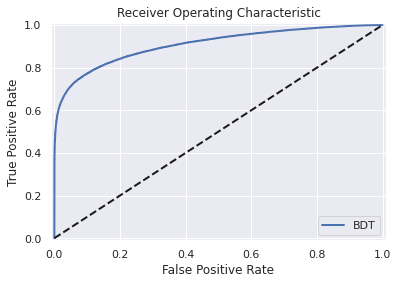

<Figure size 432x288 with 0 Axes>

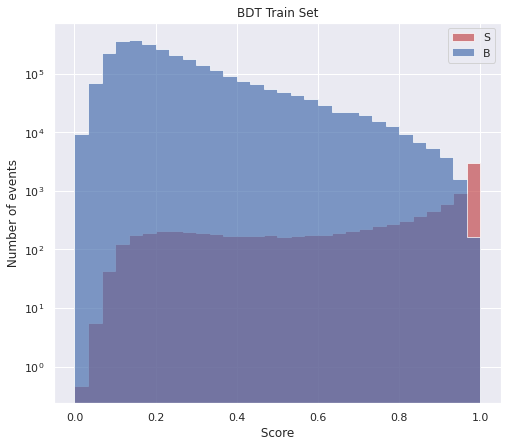

<Figure size 576x504 with 0 Axes>

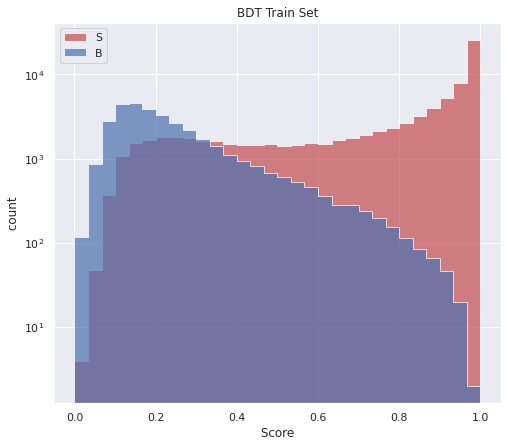

In [14]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


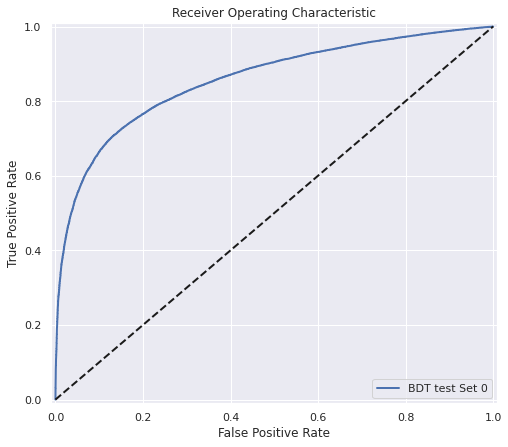

<Figure size 576x504 with 0 Axes>

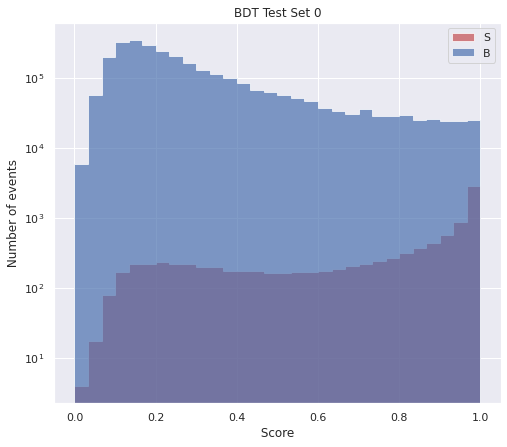

<Figure size 576x504 with 0 Axes>

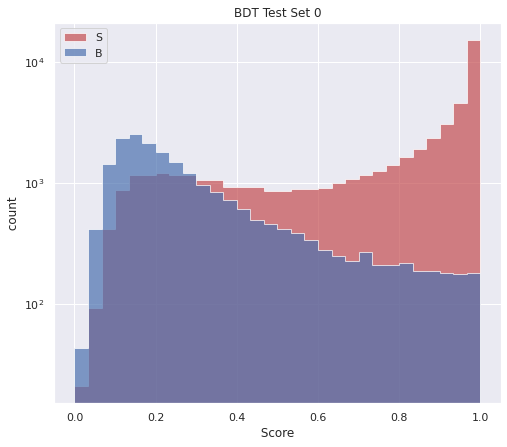

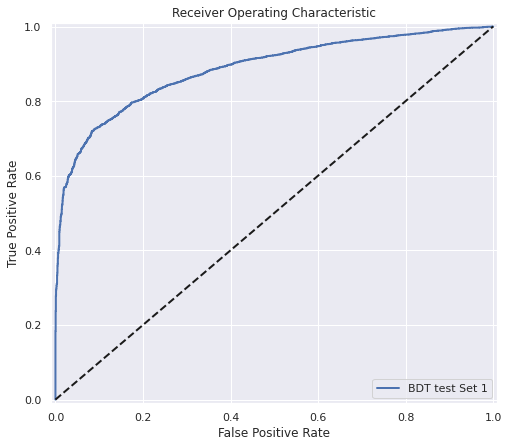

<Figure size 576x504 with 0 Axes>

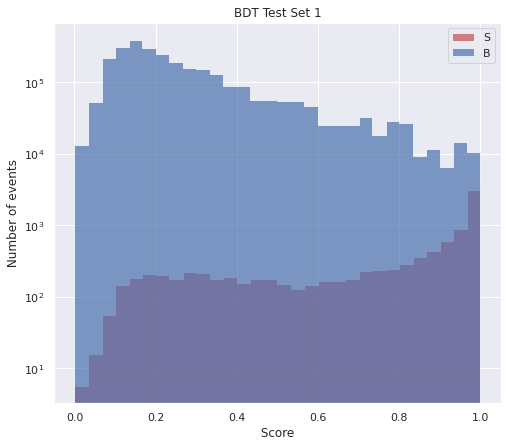

<Figure size 576x504 with 0 Axes>

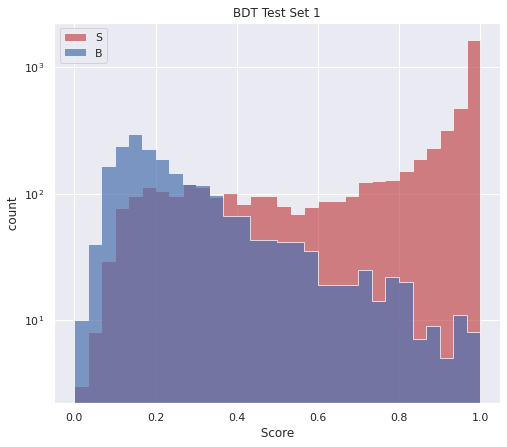

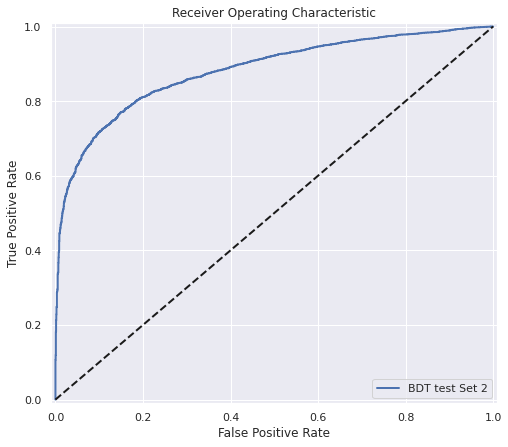

<Figure size 576x504 with 0 Axes>

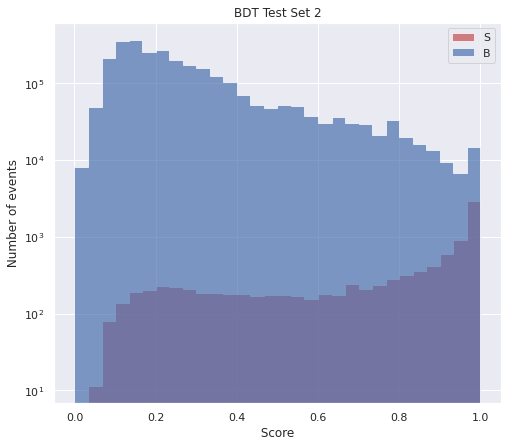

<Figure size 576x504 with 0 Axes>

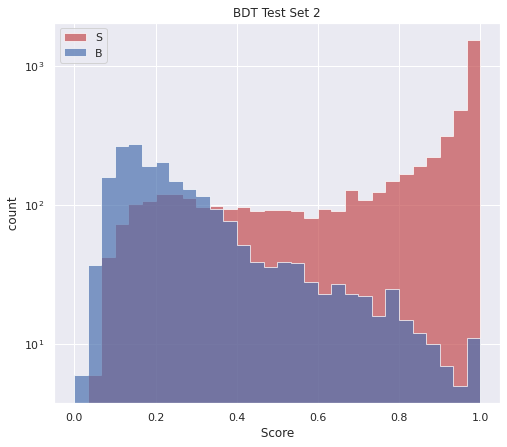

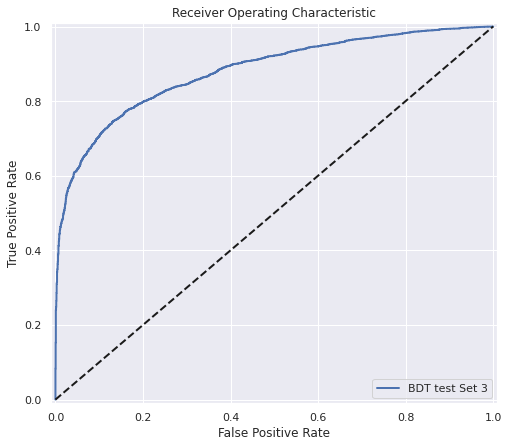

<Figure size 576x504 with 0 Axes>

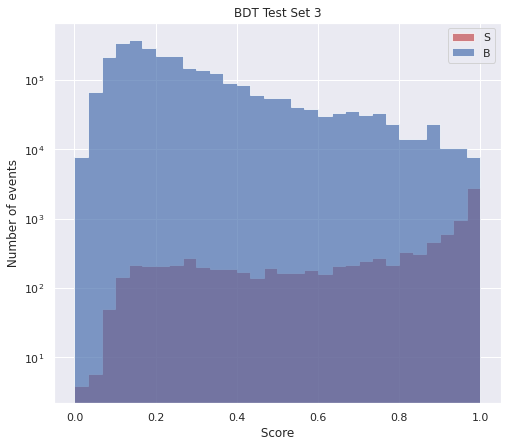

<Figure size 576x504 with 0 Axes>

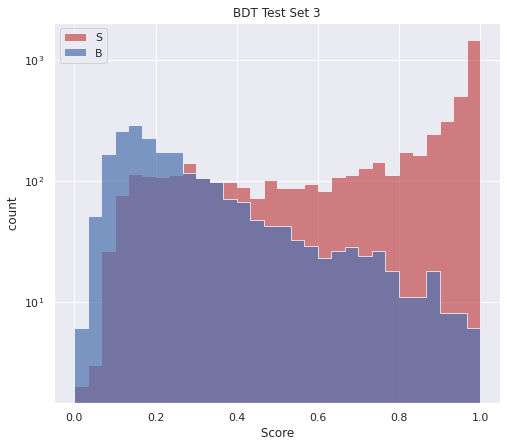

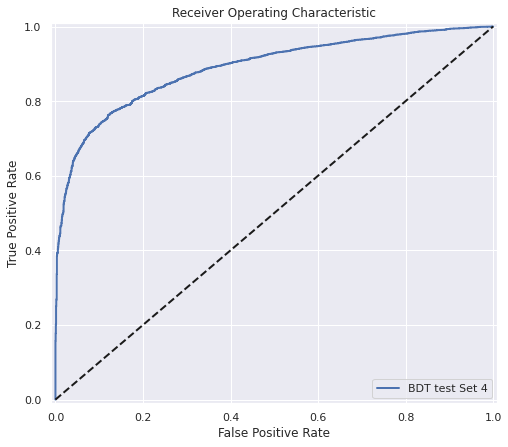

<Figure size 576x504 with 0 Axes>

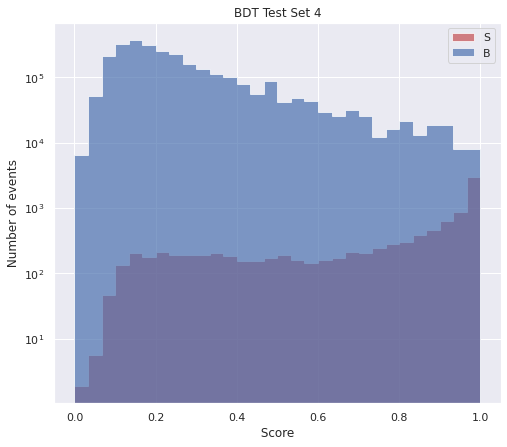

<Figure size 576x504 with 0 Axes>

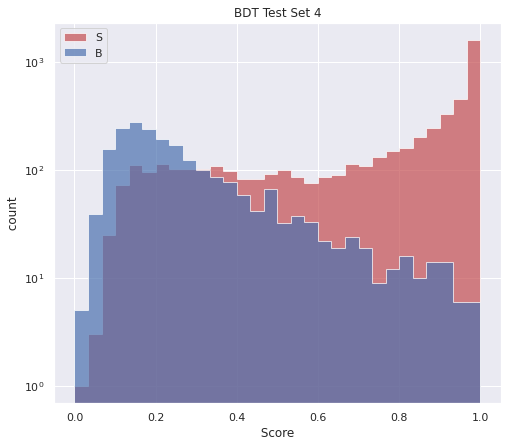

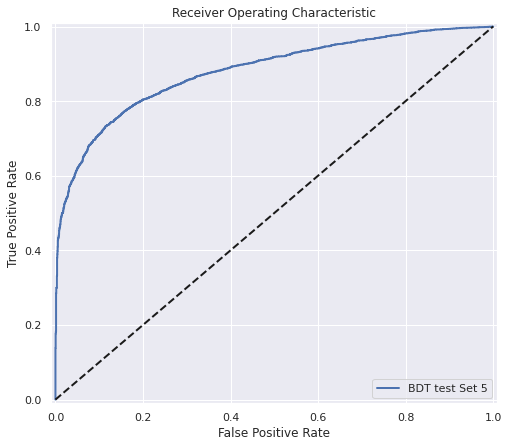

<Figure size 576x504 with 0 Axes>

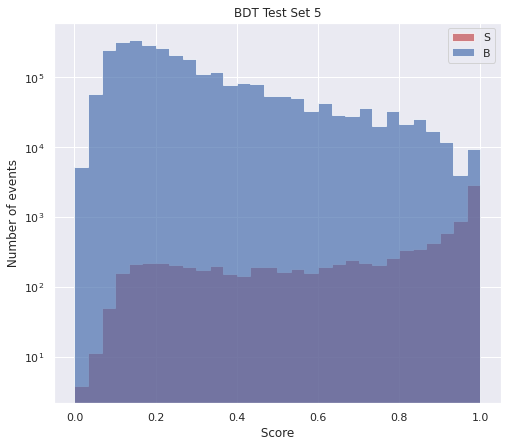

<Figure size 576x504 with 0 Axes>

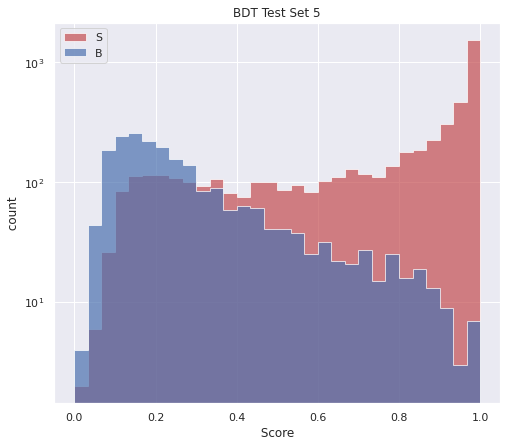

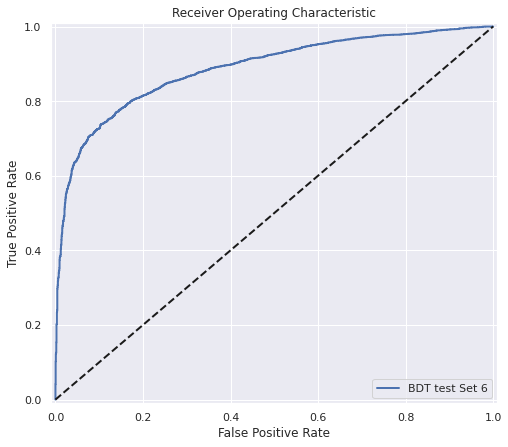

<Figure size 576x504 with 0 Axes>

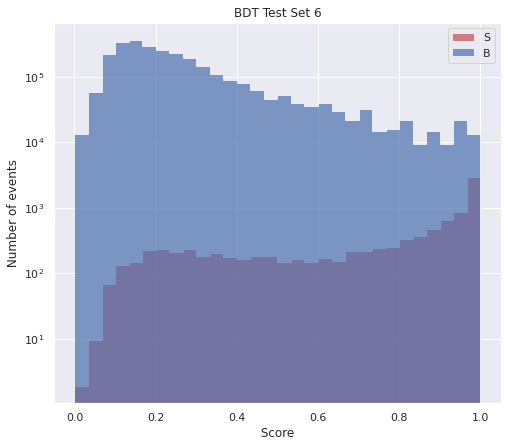

<Figure size 576x504 with 0 Axes>

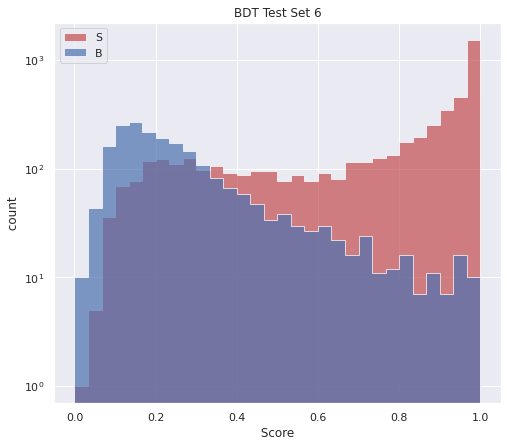

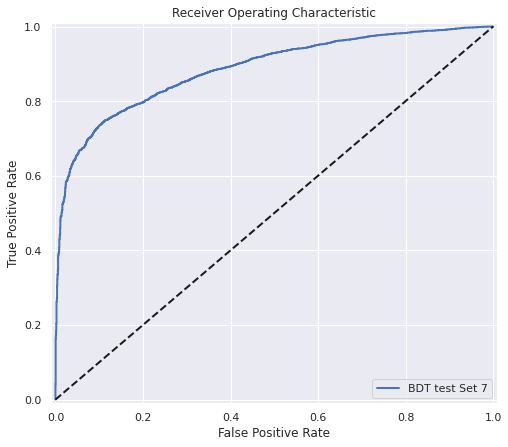

<Figure size 576x504 with 0 Axes>

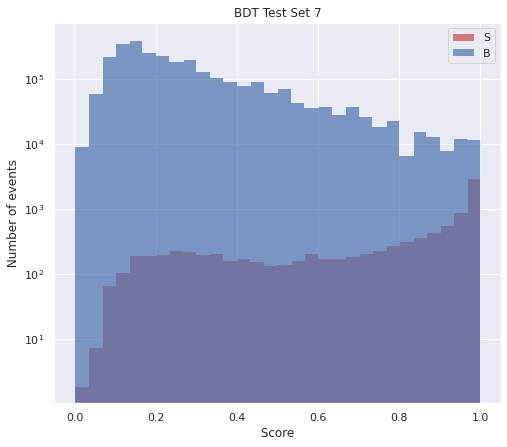

<Figure size 576x504 with 0 Axes>

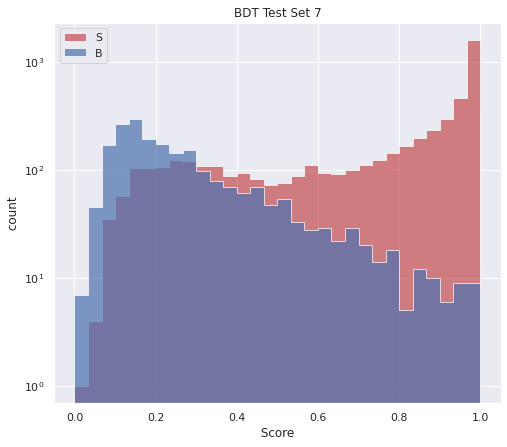

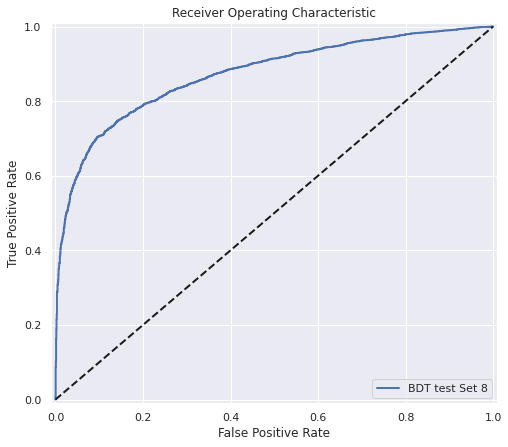

<Figure size 576x504 with 0 Axes>

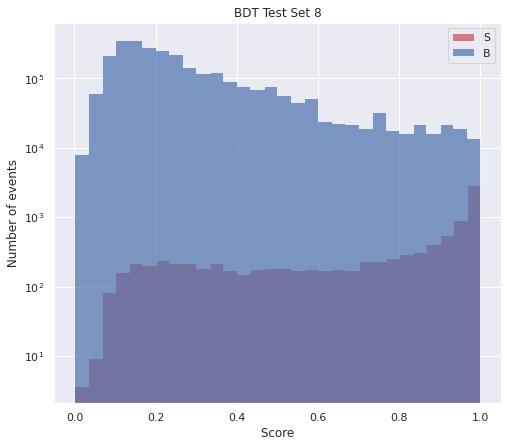

<Figure size 576x504 with 0 Axes>

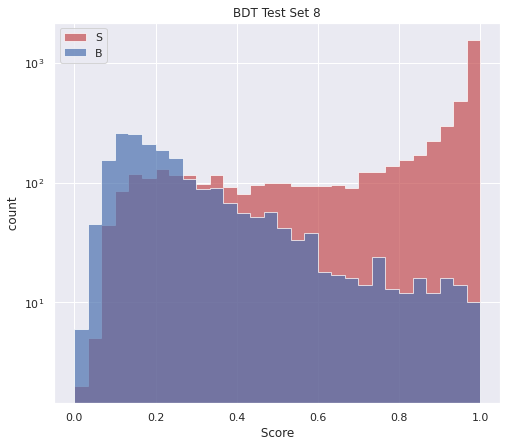

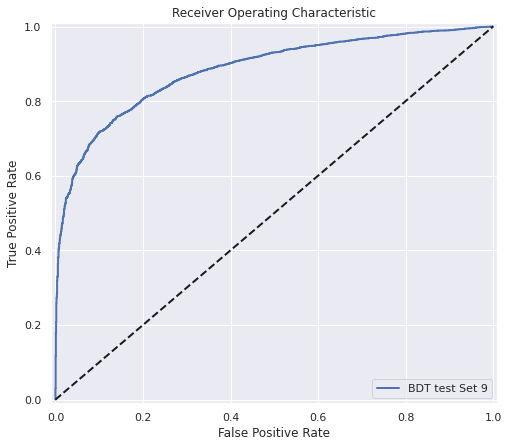

<Figure size 576x504 with 0 Axes>

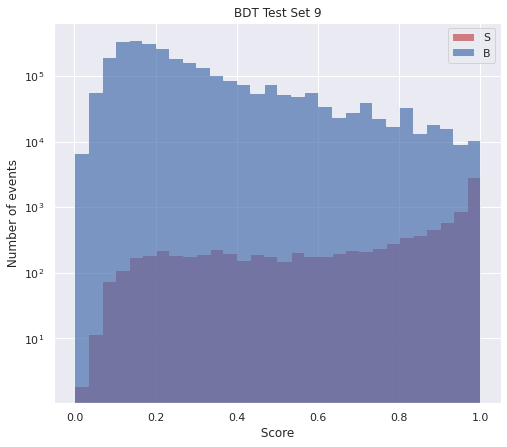

<Figure size 576x504 with 0 Axes>

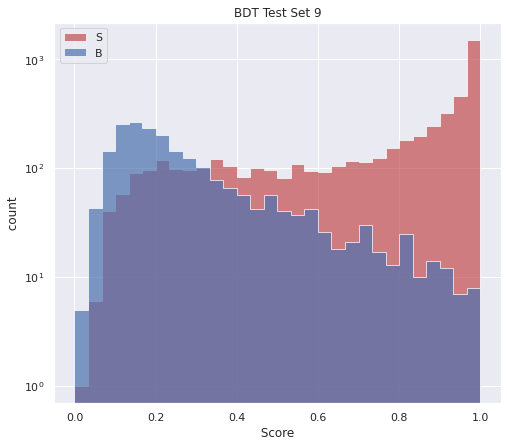

In [15]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [16]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result
[*] --- delta_mu_hat: 9.510724392359936
[*] --- mu_hats (avg): 6.100606021543884

---------------------------------
[✔] Total duration: 0:09:14.785708
---------------------------------


## End